# Question 7

Write a program to implement histogram equalization of an 8-bit/pixel gray scale image. Show that a second pass of histogram equalization will produce exactly the same result as the first pass.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Images to process

In [2]:
path_inp = '../../images/dat/'  # path for input files
path_out_orig = 'originals/'    # path for output files: originals
path_out_conv = 'converted/'    # path for output files: converted

filenames = [
    'ba256',
    'f256',
    'l256',
    'o256'
]

ext_inp = '.dat'    # file extention for input
ext_out = '.bmp'    # file extention for output

#### Convert images to numpy array and store in a list of tuples as (filename, np.array)

In [3]:
# Stores the list of dictionaries for the filename, original image, converted image/s
images = []

# Iterate for all filenames
for idx, filename in enumerate(filenames):
    # Store image pixels as uint8 2D array
    image = np.array(
        [i.strip().split() for i in open(path_inp + filename + ext_inp).readlines()],
        dtype='uint8'
    )

    # Add (filename, numpy array of image) into images list
    images.append({
        'filename': filename,
        'orig': image,
        'equalized': None
    })

    # Save original image as .dat file
    np.savetxt(
        path_out_orig + ext_inp[1:] + '/' + filename + ext_inp,
        image,
        fmt=' %d',
        newline=' \n'
    )

#### Display input images



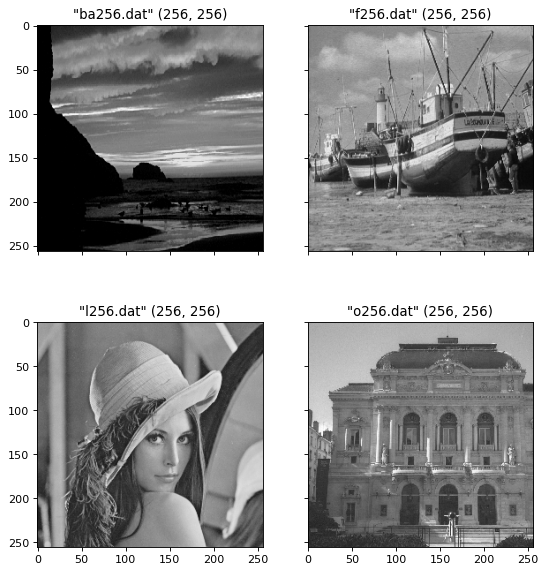

In [4]:
# Matrix dimensions
cols = 2
rows = -(-len(filenames) // cols)

# Create figure with rows × cols subplots
fig, axs = plt.subplots(rows, cols, dpi=80, sharex=True, sharey=True)
fig.set_size_inches(4 * cols, 4.5 * rows)

# Iterate for all images
for idx, image_dict in enumerate(images):
    filename = image_dict['filename']
    image = image_dict['orig']

    # Set subplot title as '"filename" (rows, cols)' 
    axs[int(idx // cols), idx % cols].set_title('"{}" {}'.format(
        filename + ext_inp,
        image.shape
    ))
    # Add subplot to figure plot buffer
    axs[int(idx // cols), idx % cols].imshow(
        image,
        cmap='gray',
        vmin=0,
        vmax=255
    )

    # Save original image as .bmp file
    plt.imsave(
        path_out_orig + ext_out[1:] + '/' + filename + ext_out,
        image,
        cmap='gray',
        vmin=0,
        vmax=255
    )

# Hide x labels and tick labels for top plots and y ticks for right plots
for ax in axs.flat:
    ax.label_outer()

# Display the figure
plt.show()

## Histogram Equalization

In [5]:
def gen_histogram(image):
    histogram = np.zeros(256)

    height, width = image.shape
    for i in range(height):
        for j in range(width):
            histogram[image[i][j]] += 1
    
    return histogram

In [6]:
def equalize_histogram(image, histogram):
    height, width = image.shape

    new_levels = np.zeros(256)
    equalized = np.zeros((height, width))

    curr = 0
    for i in range(256):
        curr += histogram[i]
        new_levels[i] = round((curr * 255) / (height * width))

    for i in range(height):
        for j in range (width):
            equalized[i][j] = new_levels[image[i][j]]
    equalized = equalized.astype('uint8')

    return equalized

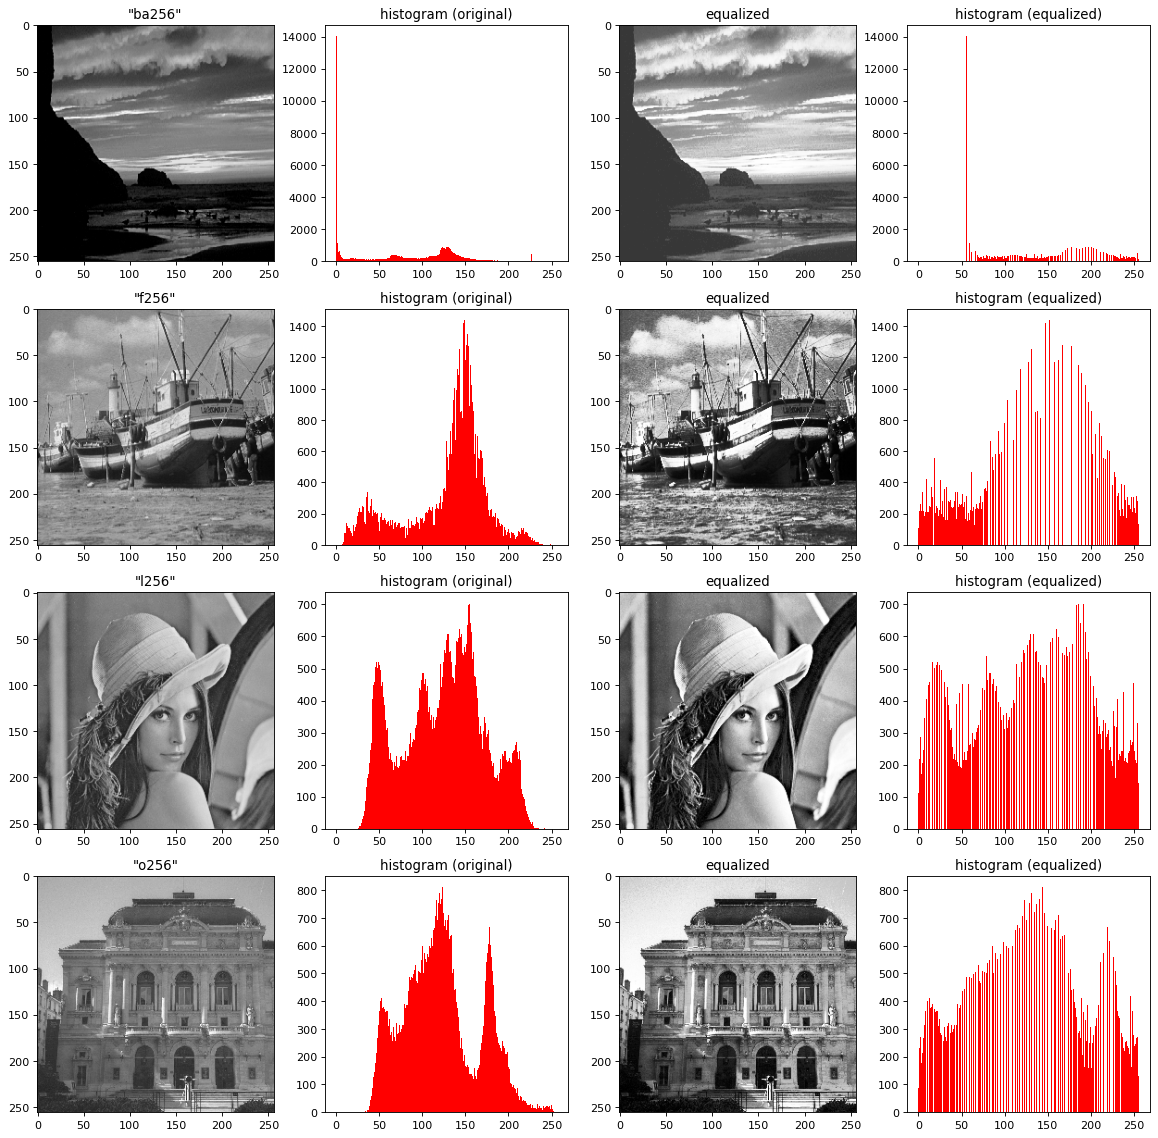

In [7]:
rows, cols = len(images), 4

# Create figure with rows × cols subplots
fig, axs = plt.subplots(rows, cols, dpi=80)
fig.set_size_inches(4.5 * cols, 4.5 * rows)

# Iterate for all images
for idx, image_dict in enumerate(images):
    filename = image_dict['filename']

    original = image_dict['orig']
    hist_original = gen_histogram(original)

    equalized = equalize_histogram(original, hist_original)
    hist_equalized = gen_histogram(equalized)

    images[idx]['equalized'] = equalized

    axs[idx, 0].set_title('"{}"'.format(filename))
    axs[idx, 0].imshow(original, cmap='gray', vmin=0, vmax=255)
    
    axs[idx, 1].set_title('histogram (original)')
    axs[idx, 1].hist(original.flatten(), 256, [0, 256], color = 'r')
    
    axs[idx, 2].set_title('equalized'.format(filename))
    axs[idx, 2].imshow(equalized, cmap='gray', vmin=0, vmax=255)

    axs[idx, 3].set_title('histogram (equalized)')
    axs[idx, 3].hist(equalized.flatten(), 256, [0, 256], color = 'r')

    # Save pixel values of original image's histogram as a 2D matrix in a .dat file
    np.savetxt(
        path_out_conv + ext_inp[1:] + '/' + filename + '_hist' + ext_inp,
        hist_original,
        fmt=' %d',
        newline=' \n'
    )

    # Save pixel values of equalized image's histogram as a 2D matrix in a .dat file
    np.savetxt(
        path_out_conv + ext_inp[1:] + '/' + filename + '_hist_equalized' + ext_inp,
        hist_equalized,
        fmt=' %d',
        newline=' \n'
    )

# Save and display the figure
plt.savefig('histogram_comp.jpg')
plt.show()

## Histogram Equalization 2nd pass

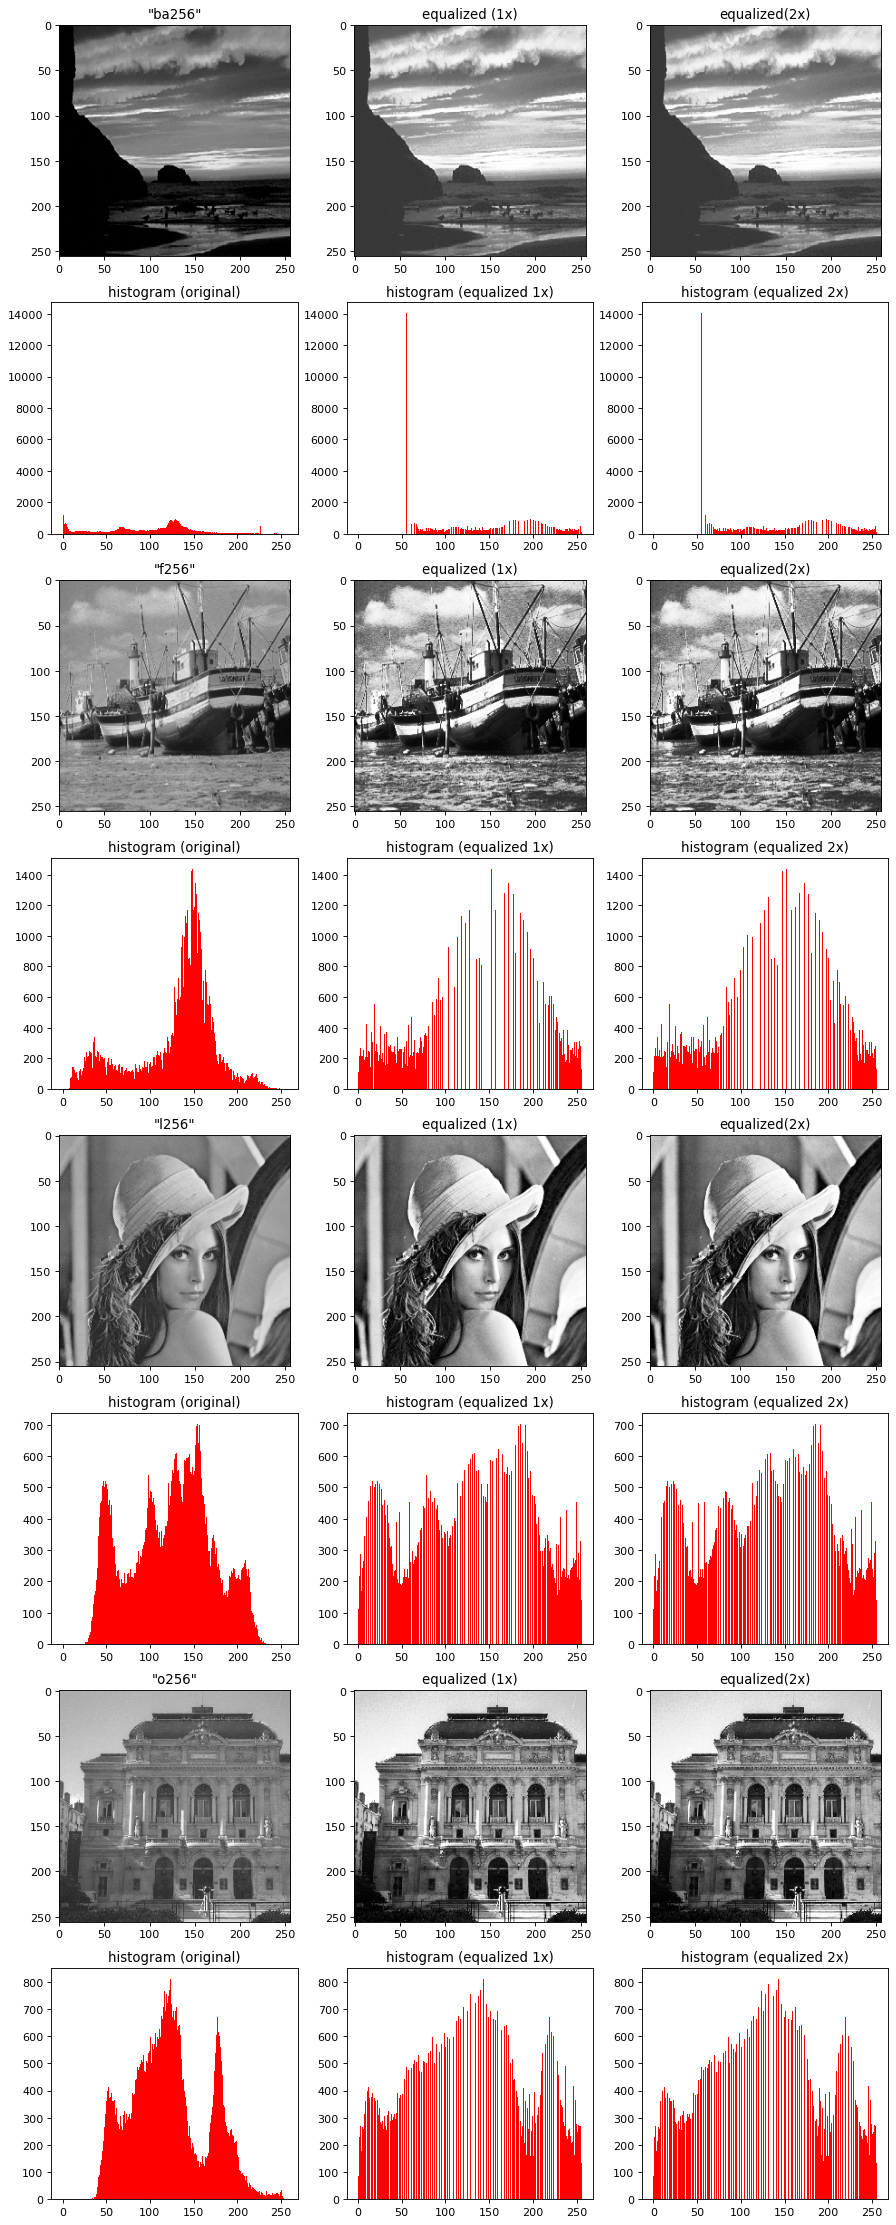

In [8]:
rows, cols = 2 * len(images), 3

# Create figure with rows × cols subplots
fig, axs = plt.subplots(rows, cols, dpi=80)
fig.set_size_inches(4.5 * cols, 4.5 * rows)

# Iterate for all images
for idx, image_dict in enumerate(images):
    filename = image_dict['filename']

    original = image_dict['orig']
    hist_original = gen_histogram(original)

    equalized = image_dict['equalized']
    hist_equalized = gen_histogram(equalized)

    equalized_2 = equalize_histogram(equalized, hist_equalized)
    hist_equalized_2 = gen_histogram(equalized_2)

    axs[2 * idx, 0].set_title('"{}"'.format(filename))
    axs[2 * idx, 0].imshow(original, cmap='gray', vmin=0, vmax=255)

    axs[2 * idx, 1].set_title('equalized (1x)'.format(filename))
    axs[2 * idx, 1].imshow(equalized, cmap='gray', vmin=0, vmax=255)

    axs[2 * idx, 2].set_title('equalized(2x)'.format(filename))
    axs[2 * idx, 2].imshow(equalized_2, cmap='gray', vmin=0, vmax=255)
    
    axs[2 * idx + 1, 0].set_title('histogram (original)')
    axs[2 * idx + 1, 0].hist(original.flatten(), 256, [0, 256], color = 'r')
    
    axs[2 * idx + 1, 1].set_title('histogram (equalized 1x)')
    axs[2 * idx + 1, 1].hist(equalized.flatten(), 256, [0, 256], color = 'r')

    axs[2 * idx + 1, 2].set_title('histogram (equalized 2x)')
    axs[2 * idx + 1, 2].hist(equalized_2.flatten(), 256, [0, 256], color = 'r')

    # Save pixel values of equalized image's histogram as a 2D matrix in a .dat file
    np.savetxt(
        path_out_conv + ext_inp[1:] + '/' + filename + '_hist_equalized_2x' + ext_inp,
        hist_equalized_2,
        fmt=' %d',
        newline=' \n'
    )

# Save and display the figure
plt.savefig('histogram_comp_2x.jpg')
plt.show()

## Resource

**GitHub repository: ** [`Image Processing and Pattern Recognition`](https://github.com/meganindya/btech-assignments/tree/main/image-processing-pattern-recognition) - [`Anindya Kundu (meganindya)`](https://github.com/meganindya)